# Introduction



the dataset contains 14 features including the present of the patient or not on his appointment date.
1- What is the number of female and male patients who showed and not-showed for the appointment?
2-  What is The highest number of appointment vs age classifier and Show , no Show appointment?
3- What is the most day  of show appotiments?

_____________________________________________________________________________

# Data Wrangling


# importing packages and libraries 


In [1]:
import pandas as pd
import numpy as np
import datetime  
from datetime import datetime
import calendar 
import matplotlib.pyplot as plt
%matplotlib inline

_____________________________________________________________________

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


observation 1:
    The data frame has 110527 rows and 14 columns

# check missing value

In [5]:
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

observation 2:
    There is no missing value in data set. 

# Check number of duplicated records in the data frame. 

In [7]:
sum(df.duplicated())

0

observation 3:
    There is no duplicated on the data fram

# check the unique value in data fram


In [8]:
col = df.columns
for x in col[5:]:
    print(x + ':', sorted(df[x].unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'J

observation 4: 
1- There is (-1) on age and more than (100) years ,lets delete it. 
2- Handicap has values 2,3,4 which are not feasible,lets delete them.
2- There is only F & M on the data fram , it is fine no error there.

# show statistical details of data 

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# cleaning data

# # Drop rows & columns 


1- I delet the age more than 100 and below 0 

In [15]:
df.drop(df[df['Age'] > 100] .index, inplace =True)

In [13]:
df.drop(df[df['Age'] < 0] .index, inplace =True)

In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105190e+05,1.105190e+05,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000,110519.000000
mean,1.474860e+14,5.675303e+06,37.084519,0.098273,0.197251,0.071870,0.030402,0.022213,0.321040
std,2.560826e+14,7.129600e+04,23.103165,0.297684,0.397925,0.258274,0.171692,0.161441,0.466878
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725522e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


2- I delet the value which is in handicap = 2,3,4 

In [19]:
df.drop(df[df['Handcap'].isin([2,3,4])].index,inplace = True)

3- I delet 'PatientId' and 'AppointmentID' no need for them 

In [20]:
df.drop(['PatientId', 'AppointmentID'],axis=1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


observation 5 : 
    From above DataFrame I  see that there are a few spelling mistakes in the names.

# Fix column names spelling mistakes and apply lowercase letter and underscore word separation

1-new column names for columns requires word seperation with underscore or spelling mistakes

In [23]:
columnNames = {
            "PatientId":"patient_id", 
            "AppointmentID":"appointment_id",
            "ScheduledDay":"scheduled_day",
            "AppointmentDay":"appointment_day",
            "Hipertension":"hypertension",
            "Handcap":"handicap",
            "No-show":"no_show"
            }

In [24]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [25]:
df.rename(columns=columnNames, inplace=True)

2-lower case all columns names

In [26]:
df.columns = df.columns.str.lower()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hypertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handicap         110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


fine the names of Column are changing

# converting column appointment_day to datetime64


In [28]:
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format="%Y-%m-%d %H:%M:%S")

In [29]:
df['appointment_day'].describe()

count                        110527
unique                           27
top       2016-06-06 00:00:00+00:00
freq                           4692
first     2016-04-29 00:00:00+00:00
last      2016-06-08 00:00:00+00:00
Name: appointment_day, dtype: object

In [30]:
df['appointment_day'].dt.time.describe()

count       110527
unique           1
top       00:00:00
freq        110527
Name: appointment_day, dtype: object

In [33]:
#print appointment unique years
print("Appointments occured in years of: " + np.array2string(df['appointment_day'].dt.year.unique()))
#print appointment unique months
print("Appointments occured in months of: " + np.array2string(df['appointment_day'].dt.month.unique()))
#print appointment unique days
print("Appointments occured in days of: " + np.array2string(df['appointment_day'].dt.day.unique()))

Appointments occured in years of: [2016]
Appointments occured in months of: [4 5 6]
Appointments occured in days of: [29  3 10 17 24 31  2 30 16  4 19 12  6 20  5 13  9 25 11 18 14  7  1  8]


 add list of week_days , classifier day and return ,store day in new column week_day 

In [38]:

week_day_list = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

def week_day_classifier(day):
    return week_day_list[day];

df["week_day"] = df["appointment_day"].dt.weekday.apply(week_day_classifier)

df[[ "appointment_id", "week_day"]].head()

,appointment_id,week_day
0,5642903,Friday
1,5642503,Friday
2,5642549,Friday
3,5642828,Friday
4,5642494,Friday


drop appointment_day column

In [46]:

df.drop(columns=["appointment_day"], inplace=True)

KeyError: "['appointment_day'] not found in axis"

In [42]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,week_day
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


# Classification Age 

 Add age classifier  and return ,store age group in new column age_group 

In [89]:

def age_classifier(age):
    if age >= 0 and age <18:
        return "Kids"
    elif age >= 18 and age < 37:
        return "Adults"
    elif age >= 37 and age < 55:
        return "Matures"
    else:
        return "Elders"

df["age_group"] = df["age"].apply(age_classifier)

In [90]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,week_day,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Elders
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Elders
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Elders
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Kids
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Elders


In [103]:
df['age_group'].describe()

count     110527
unique         4
top       Elders
freq       28930
Name: age_group, dtype: object

observation 6:
    The most of patients are Elders above of 55 years

____________________________________________________________________________________

# Exploratory Analysis


# 1- Gender who did not show up and show up for appointment

In [48]:
male_no_shows = df[(df['gender'] == "M") & (df['no_show'] == 'Yes')]
males_no_shows = int(len(male_no_shows))
print ("Male who did not show up for appointment : ",males_no_shows)

Male who did not show up for appointment :  7725


In [49]:
male_shows = df[(df['gender'] == "M") & (df['no_show'] == 'No')]
males_shows = int(len(male_no_shows))
print ("Male who show up for appointment : ",males_shows)

Male who show up for appointment :  7725


In [50]:
femles_no_shows = df[(df['gender'] == "F") & (df['no_show'] == 'Yes')]
femles_no_shows = int(len(femles_no_shows))
print ("Femles who did not show up for appointment : ",femles_no_shows)

Femles who did not show up for appointment :  14594


In [51]:
femles_shows = df[(df['gender'] == "F") & (df['no_show'] == 'No')]
femles_shows = int(len(femles_shows))
print ("Femles who show up for appointment : ",femles_shows)

Femles who show up for appointment :  57246


# 1.1 Plot Gender who did not show up and show up  for appointment 


Text(0, 0.5, 'Count')

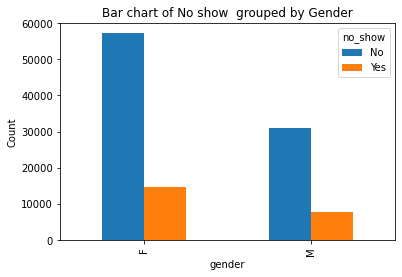

In [85]:
grouping_gender_noshow = df.groupby(['gender','no_show'])
grouping_gender_noshow.size().unstack().plot(kind='bar', title = 'Bar chart of No show  grouped by Gender')
plt.ylabel('Count')

The bar chart representation of No show with Gender

the Blue bar shows the people that showed for the medical appointment
the Orange bar shows the people that did not show for the medical appointment.
There are more female patient than male patient in dataset.


________________________________________________________________________

# 2-  Age Classifier who did not show up and show up  for appointment 


Text(0.5, 1.0, 'Age vs No Show Histogram')

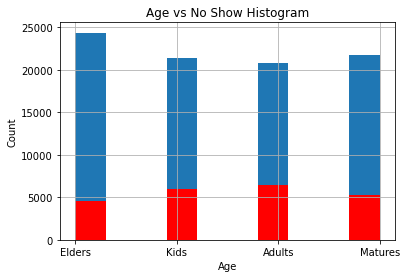

In [116]:
df.age_group[df['no_show'] == 'No'].hist(label = 'showed up')
df.age_group[df['no_show'] == 'Yes'].hist(label = 'not showed up',color = 'red')
plt.xlabel('Age Classifier')
plt.ylabel('Count')
plt.title('Age Classifier vs No Show Histogram')

The bar chart representation of No show with Age Classifier 


Adults is the highest  number of Patients No show appointment.

Elders is the highest  number of Patients  Show appointment.

 

In [96]:
age_group_all = df.groupby(["age_group"])[["age_group"]].count()
print(age_group_all)

           age_group
age_group           
Adults         27204
Elders         28930
Kids           27379
Matures        27014


Text(0.5, 1.0, 'Pie  chart of age_group  ')

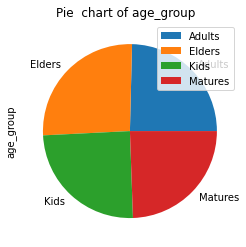

In [99]:
age_group_all .plot.pie(subplots=True)

plt.title('Pie  chart of age_group  ')


The pie chart representation of  Age Classifier 
The Most of Patients are (Elders=28930) 

# What is The highest number of appointment vs age classifier ?

In [107]:

age_group_all.columns = ["Age Group"]
age_group_all["Age Group"] = age_group_all["Age Group"] / sum(age_group_all["Age Group"]) * 100
age_group_all.reset_index(inplace=True)

Text(0.5, 1.0, 'Box  chart of Age Group vs Appointment Count  ')

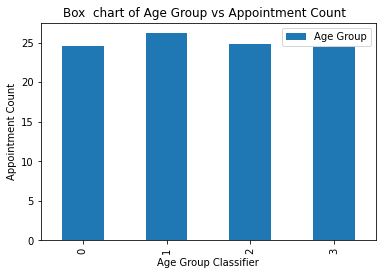

In [113]:

age_group_all.plot.bar()
plt.xlabel('Age Group Classifier')
plt.ylabel('Appointment Count')
plt.title('Box  chart of Age Group vs Appointment Count  ')


The bar chart representation of  Age Classifier 
Age Group Classifier : 0 "Under 18" 
1 "19 to 37"
2 "38 to 55"
3 "Above 55"
Adults(age between 19 to 37)  has greatest number of appointments

_________________________________________________________________________

# 3-  What day of a week the most  people confirm  the  appointment?

In [73]:
Monday_Shows = df[(df['week_day'] == "Monday") & (df['no_show'] == 'No')].count()
print ("Number of show Patient on Monday: ",Monday_Shows)


Number of show Patient on Monday:  patient_id        18025
appointment_id    18025
gender            18025
scheduled_day     18025
age               18025
neighbourhood     18025
scholarship       18025
hypertension      18025
diabetes          18025
alcoholism        18025
handicap          18025
sms_received      18025
no_show           18025
week_day          18025
dtype: int64


In [72]:
Tuesday_Shows = df[(df['week_day'] == "Tuesday") & (df['no_show'] == 'No')].count()

print ("Number of show Patient on  : ",Tuesday_Shows)


Number of show Patient on  :  patient_id        20488
appointment_id    20488
gender            20488
scheduled_day     20488
age               20488
neighbourhood     20488
scholarship       20488
hypertension      20488
diabetes          20488
alcoholism        20488
handicap          20488
sms_received      20488
no_show           20488
week_day          20488
dtype: int64


In [70]:
Wednesday_Shows = df[(df['week_day'] == "Wednesday") & (df['no_show'] == 'No')].count()

print ("Number of show Patient on Wednesday : ",Wednesday_Shows)

Number of show Patient on Wednesday :  patient_id        20774
appointment_id    20774
gender            20774
scheduled_day     20774
age               20774
neighbourhood     20774
scholarship       20774
hypertension      20774
diabetes          20774
alcoholism        20774
handicap          20774
sms_received      20774
no_show           20774
week_day          20774
dtype: int64


In [69]:
Thursday_Shows = df[(df['week_day'] == "Thursday") & (df['no_show'] == 'No')].count()
print ("Number of show Patient on Thursday : ",Thursday_Shows)

Number of show Patient on Thursday :  patient_id        13909
appointment_id    13909
gender            13909
scheduled_day     13909
age               13909
neighbourhood     13909
scholarship       13909
hypertension      13909
diabetes          13909
alcoholism        13909
handicap          13909
sms_received      13909
no_show           13909
week_day          13909
dtype: int64


In [68]:
Friday_Shows = df[(df['week_day'] == "Friday") & (df['no_show'] == 'No')].count()

print ("Number of show Patient on Friday : ",Friday_Shows)

Number of show Patient on Friday :  patient_id        14982
appointment_id    14982
gender            14982
scheduled_day     14982
age               14982
neighbourhood     14982
scholarship       14982
hypertension      14982
diabetes          14982
alcoholism        14982
handicap          14982
sms_received      14982
no_show           14982
week_day          14982
dtype: int64


In [67]:
Saturday_Shows = df[(df['week_day'] == "Saturday") & (df['no_show'] == 'No')].count()

print ("Number of show Patient on Saturday : ",Saturday_Shows)

Number of show Patient on Saturday :  patient_id        30
appointment_id    30
gender            30
scheduled_day     30
age               30
neighbourhood     30
scholarship       30
hypertension      30
diabetes          30
alcoholism        30
handicap          30
sms_received      30
no_show           30
week_day          30
dtype: int64


In [66]:
Sunday_Shows = df[(df['week_day'] == "Sunday") & (df['no_show'] == 'No')].count()

print ("Number of show Patient on Sunday : ",Sunday_Shows)

Number of show Patient on Sunday :  patient_id        0
appointment_id    0
gender            0
scheduled_day     0
age               0
neighbourhood     0
scholarship       0
hypertension      0
diabetes          0
alcoholism        0
handicap          0
sms_received      0
no_show           0
week_day          0
dtype: int64


Text(0.5, 1.0, 'Box  chart of No show  grouped Day  ')

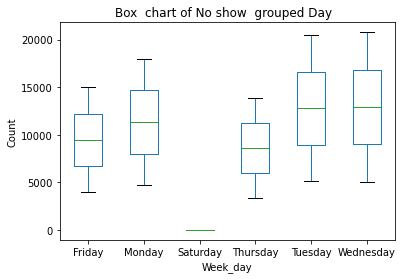

In [87]:
grouping_day_noshow = df.groupby(['no_show','week_day'])
grouping_day_noshow.size().unstack().plot.box()
plt.xlabel('Week_day')
plt.ylabel('Count')
plt.title('Box  chart of No show  grouped Day  ')

The box chart representation of No show with week day


Wednesday is the highest  day of Patients number confirm appointment.

Saturday is the lowest  day of Patients number confirm appointment.

No Patients comming to appointment on Sunday. 

